<a href="https://colab.research.google.com/github/keitake123/LSTM-estimation-modelling/blob/main/estimate_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import csv
import glob
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.optim as optim
import datetime
import tkinter
import cv2
from PIL import Image, ImageTk
import time
import matplotlib.pyplot as plt

In [ ]:
def twosComplement_hex(hexval):
    bits = 16
    val =hexval
    if val & (1 << (bits-1)):
        val -= 1 << bits
    return val

def _is_hex(val):
    try:
        x = int(val, 16)
        return True
    except ValueError:
        return False

class LSTM(nn.Module):

    def __init__(self):

        super(LSTM, self).__init__()
        self.seq_len = 200 
        self.feature_size = 3 
        self.hidden_layer_size = 100 
        self.lstm_layers = 1 
        self.lstm = nn.LSTM(self.feature_size, self.hidden_layer_size, num_layers = self.lstm_layers)
        self.fc = nn.Linear(self.hidden_layer_size, 10)

    def init_hidden_cell(self, batch_size):
        hedden = torch.zeros(self.lstm_layers, batch_size, self.hidden_layer_size, device=x.device)
        cell = torch.zeros(self.lstm_layers, batch_size, self.hidden_layer_size, device=x.device)
        return (hedden, cell)

    def forward(self, x):
        batch_size = 1
        # print(batch_size)

        hedden = torch.zeros(self.lstm_layers, batch_size, self.hidden_layer_size, device=x.device)
        cell = torch.zeros(self.lstm_layers, batch_size, self.hidden_layer_size, device=x.device)
        self.hidden_cell = (hedden, cell)

        # print(x.size())
        x = x.view(batch_size, self.seq_len, self.feature_size)  
                                                                 
        # print(x.size())
        x = x.permute(1, 0, 2)                                   

        lstm_out, (h_n, c_n) = self.lstm(x, self.hidden_cell)   
                                                                 
        x = h_n[-1,:,:]                                          
        x = self.fc(x)

        return x


In [ ]:
model_path = '/content/drive/MyDrive/GIYSEdemo/model.pth'
net = LSTM()
net.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))


<All keys matched successfully>

In [ ]:
test_file = '/content/drive/MyDrive/GIYSEdemo/test.csv'

In [ ]:
classes = ['すいすい(Wipe)', 'さっさっ(Sweep)', 'ごしごし(Rub)', 'さしこみ(Insert)', 'そのほか(Other)']

test_data = []
test_data.append([[], [], []])

with open(test_file,"r") as f:
    reader = csv.reader(f)
    num_dim = 0
    for row in reader:
        if('nan' in row[2]) or ('nan' in row[3]) or ('nan' in row[4]):
            pass
        elif (num_dim < 200):
            test_data[0][0].append(row[2])  #xaxis
            test_data[0][1].append(row[3])  #yaxis
            test_data[0][2].append(row[4])  #zaxis
            num_dim += 1
        else :
            break


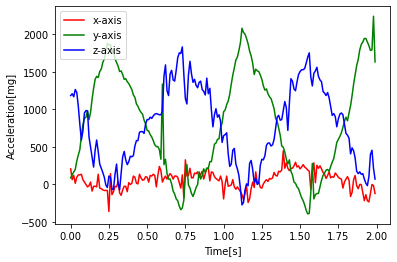

In [ ]:
fig, ax = plt.subplots(1, 1)

x = np.arange(0,2,0.01)

xx = [float(i) for i in test_data[0][0]]
yy = [float(i) for i in test_data[0][1]]
zz = [float(i) for i in test_data[0][2]]
ax.plot(x,xx, label='x-axis', color='red')
ax.plot(x,yy, label='y-axis', color='green')
ax.plot(x,zz, label='z-axis', color='blue')
ax.set_xlabel("Time[s]")
ax.set_ylabel("Acceleration[mg]")
ax.legend()
plt.pause(0.001)
plt.show()

In [ ]:
test_data = np.array(test_data, dtype=np.int64)
test_data = torch.tensor(test_data, dtype=torch.float32)

In [ ]:
net.eval()
outputs = net(test_data)
_, preds = torch.max(outputs, 1)
print('識別結果 ： ' + classes[preds[0].item()])
